In [1]:
import sys
import os

SCRIPT_PATH = os.path.join(os.path.abspath(os.path.dirname('../__file__')), 'script')
sys.path.insert(0, SCRIPT_PATH)

from markov_device import *
import matplotlib.pyplot as plt
import seaborn as sns

ACT-R connection has been started.


# Activation and Utility Traces of Two Models



## Model-Free

In [2]:
def test3(m, title_name='model-free', n=50):
    
    m.run_experiment(n) 
    
    df = m.calculate_stay_probability()
    print(">> %s << \ngained rewards: %.2f" % (title_name, df['received_reward'].sum()/len(df)))

    
    # production trace
    df1 = m.df_actr_production_traces(parameter_name=':utility')
    df1['index_bin'] = pd.cut(df1['index'], 10, labels=False, ordered=False, right=False)

    # memory trace
    try: 
        df2 = m.df_actr_chunk_traces(parameter_name=':Last-Retrieval-Activation')
        df2['index_bin'] = pd.cut(df2['index'], 10, labels=False)  
        df2.replace(to_replace=[None], value=np.nan, inplace=True)
        #selected_memory = df2.groupby('memory')[':Last-Retrieval-Activation'].mean().sort_values(ascending = False).index[:4].values
        selected_memory = ['M1-1', 'M1-2', 'M1-3', 'M1-4']
        df2 = df2[df2.apply(lambda x: x['memory'] in selected_memory, axis=1)]
    except:
        print('no memory trace')
        df2 = None
    finally:
        df1 = df1.astype({'index_bin':'float', ':utility':'float'})  
        df2 = df2.astype({'index_bin':'float', ':Last-Retrieval-Activation':'float'})  
        return df1, df2 

######### SETUP MODEL markov-model1 #########
 	>> TASK PARAMETERS: {'MARKOV_PROBABILITY': 0.7, 'REWARD_PROBABILITY': 0.7, 'REWARD': {'B1': 2, 'B2': 0, 'C1': 0, 'C2': 0}} <<
 	>> ACT-R PARAMETERS: {'v': None, 'seed': [100, 0], 'ans': 0.1, 'le': 1.0, 'mas': None, 'egs': 0.1, 'alpha': 0.2, 'imaginal-activation': 1.0} <<

>> model-free << 
gained rewards: 0.56


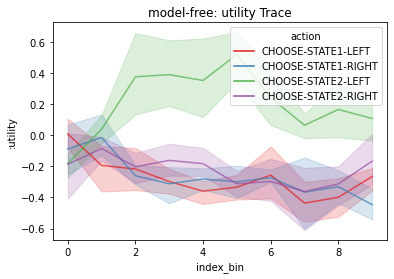

In [3]:
m = MarkovACTR(setup=False)
m.setup(model='markov-model1', verbose=False)
print(m)

df1, df2 = test3(m, 'model-free')
ax = sns.lineplot(data = df1, x='index_bin', y=':utility', hue='action', alpha=.7, palette='Set1')
plt.title('model-free: utility Trace')
plt.show()

## Model-Base

######### SETUP MODEL markov-model2 #########
 	>> TASK PARAMETERS: {'MARKOV_PROBABILITY': 0.7, 'REWARD_PROBABILITY': 0.7, 'REWARD': {'B1': 2, 'B2': 0, 'C1': 0, 'C2': 0}} <<
 	>> ACT-R PARAMETERS: {'v': None, 'seed': [100, 0], 'ans': 0.1, 'le': 1.0, 'mas': None, 'egs': 0.1, 'alpha': 0.2, 'imaginal-activation': 1.0} <<

>> model-base << 
gained rewards: 0.92


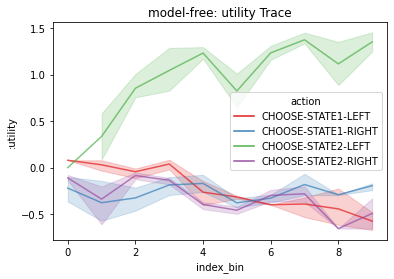

In [4]:
m = MarkovACTR(setup=False)
m.setup(model='markov-model2', verbose=False)
print(m)

df1, df2 = test3(m, 'model-base')
ax = sns.lineplot(data = df1, x='index_bin', y=':utility', hue='action', alpha=.7, palette='Set1')
plt.title('model-free: utility Trace')
plt.show()

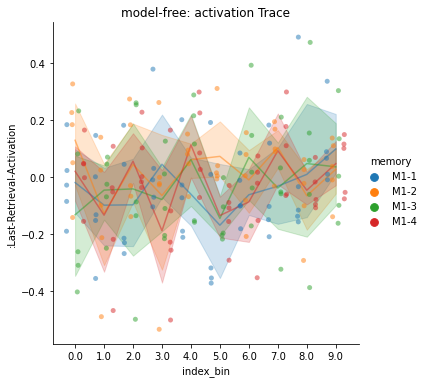

In [5]:
ax = sns.catplot(data = df2, x='index_bin', y=':Last-Retrieval-Activation', hue='memory', alpha=.5, dodge=True)
ax = sns.lineplot(data = df2, x='index_bin', y=':Last-Retrieval-Activation', hue='memory', alpha=.5, legend=False)
plt.title('model-free: activation Trace')
plt.show()

# Learn LL and RR Rule

Next, let's compare two model's performance by asking them to learn more complicated rule


### Model-Free

In [6]:
m = MarkovACTR(setup=False)
m.setup(model='markov-model1', 
        verbose=False, 
        actr_params={'v': 'nil'}, 
        task_params={'REWARD_PROBABILITY':1.0, 'REWARD': {'B1': 2, 'B2': 0, 'C1': 0, 'C2': 2}})
print(m)

######### SETUP MODEL markov-model1 #########
 	>> TASK PARAMETERS: {'MARKOV_PROBABILITY': 0.7, 'REWARD_PROBABILITY': 1.0, 'REWARD': {'B1': 2, 'B2': 0, 'C1': 0, 'C2': 2}} <<
 	>> ACT-R PARAMETERS: {'v': 'nil', 'seed': [100, 0], 'ans': 0.1, 'le': 1.0, 'mas': None, 'egs': 0.1, 'alpha': 0.2, 'imaginal-activation': 1.0} <<



>> model-free << 
gained rewards: 1.16


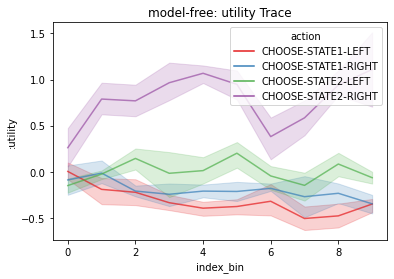

In [7]:
df1, df2 = test3(m, 'model-free')
ax = sns.lineplot(data = df1, x='index_bin', y=':utility', hue='action', alpha=.7, palette='Set1')
plt.title('model-free: utility Trace')
plt.show()

### Model-Base

In [8]:
m.setup(model='markov-model2', 
        verbose=False, 
        actr_params={'v': 'nil'}, 
        task_params={'REWARD_PROBABILITY':1.0, 'REWARD': {'B1': 2, 'B2': 0, 'C1': 0, 'C2': 2}})
print(m)

######### SETUP MODEL markov-model2 #########
 	>> TASK PARAMETERS: {'MARKOV_PROBABILITY': 0.7, 'REWARD_PROBABILITY': 1.0, 'REWARD': {'B1': 2, 'B2': 0, 'C1': 0, 'C2': 2}} <<
 	>> ACT-R PARAMETERS: {'v': 'nil', 'seed': [100, 0], 'ans': 0.1, 'le': 1.0, 'mas': None, 'egs': 0.1, 'alpha': 0.2, 'imaginal-activation': 1.0} <<



>> model-base << 
gained rewards: 1.58


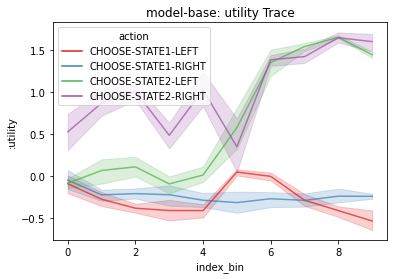

In [9]:
df1, df2 = test3(m, 'model-base')
ax = sns.lineplot(data = df1, x='index_bin', y=':utility', hue='action', alpha=.7, palette='Set1')
plt.title('model-base: utility Trace')
plt.show()

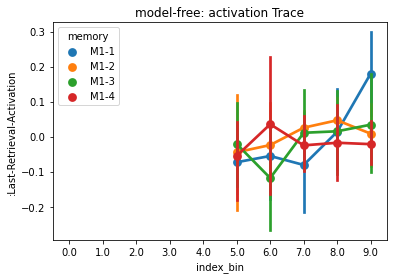

In [10]:
sns.pointplot(data = df2, x='index_bin', y=':Last-Retrieval-Activation', hue='memory', alpha=.5)
plt.title('model-free: activation Trace')
plt.show()